In [77]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

random.seed(98)
le = LabelEncoder()

In [78]:
data = pd.read_csv('Data_for_UCI_named.csv')
data.shape

(10000, 14)

In [79]:
#Initialising variables
y = data['stabf']
x = data.drop(columns = ['stabf'])
y = le.fit_transform(y)

#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30)

Train on 5600 samples, validate on 1400 samples
Epoch 1/50
 - 0s - loss: 0.2582 - accuracy: 0.6625 - val_loss: 0.1645 - val_accuracy: 0.7714
Epoch 2/50
 - 0s - loss: 0.1473 - accuracy: 0.8052 - val_loss: 0.1367 - val_accuracy: 0.8200
Epoch 3/50
 - 0s - loss: 0.1270 - accuracy: 0.8363 - val_loss: 0.1233 - val_accuracy: 0.8436
Epoch 4/50
 - 0s - loss: 0.1143 - accuracy: 0.8543 - val_loss: 0.1118 - val_accuracy: 0.8557
Epoch 5/50
 - 0s - loss: 0.1055 - accuracy: 0.8682 - val_loss: 0.1049 - val_accuracy: 0.8779
Epoch 6/50
 - 0s - loss: 0.0993 - accuracy: 0.8780 - val_loss: 0.1021 - val_accuracy: 0.8814
Epoch 7/50
 - 0s - loss: 0.0950 - accuracy: 0.8843 - val_loss: 0.0981 - val_accuracy: 0.8814
Epoch 8/50
 - 0s - loss: 0.0886 - accuracy: 0.9020 - val_loss: 0.0931 - val_accuracy: 0.9129
Epoch 9/50
 - 0s - loss: 0.0861 - accuracy: 0.9039 - val_loss: 0.0930 - val_accuracy: 0.8900
Epoch 10/50
 - 0s - loss: 0.0820 - accuracy: 0.9143 - val_loss: 0.0879 - val_accuracy: 0.9050
Epoch 11/50
 - 0s - l

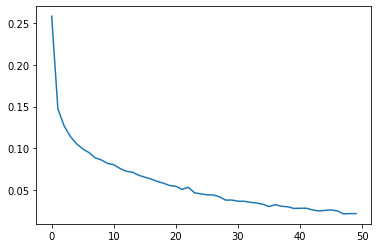

In [80]:
random.seed(98)

from keras.models import Sequential
from keras.layers import Dense, Activation

n_cols = x_train.shape[1]
model = Sequential()

#Layers
model.add(Dense(32, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))

#Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 50, verbose = 2, epochs = 50, validation_split = 0.2)
plt.plot(history.history['loss'])

In [84]:
print("Training Accuaracy = " + str(100 * history.history['accuracy'][-1]))
print("Validation Accuaracy = " + str(100 * history.history['val_accuracy'][-1]))

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

Training Accuaracy = 97.89285659790039
Validation Accuaracy = 96.35714292526245


In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1075,   16],
       [  60, 1849]], dtype=int64)

In [89]:
print("Accuracy = " + str(100 * (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][1] + cm[0][0] + cm[1][1])))

Accuracy = 97.46666666666667
